In [5]:
%matplotlib inline
import math,sys, os, numpy as np
from numpy.linalg import norm
from PIL import Image
from matplotlib import pyplot as plt, rcParams, rc
from scipy.ndimage import imread
from skimage.measure import block_reduce
import pickle as pickle
from scipy.ndimage.filters import correlate, convolve
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 6
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [22]:
def plots(ims, interp=False, titles=None):
    ims=np.array(ims)
    mn,mx=ims.min(),ims.max()
    f = plt.figure(figsize=(12,24))
    for i in range(len(ims)):
        sp=f.add_subplot(1, len(ims), i+1)
        if not titles is None: sp.set_title(titles[i], fontsize=18)
        plt.imshow(ims[i], interpolation=None if interp else 'none', vmin=mn,vmax=mx)

def plot(im, interp=False):
    f = plt.figure(figsize=(3,6), frameon=True)
    plt.imshow(im, interpolation=None if interp else 'none')

plt.gray()
plt.close()

In [14]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [15]:
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [18]:
mnist['data'].shape, mnist['target'].shape

((70000, 784), (70000,))

In [19]:
images = np.reshape(mnist['data'], (70000, 28, 28))
labels = mnist['target'].astype(int) # for label we are converting them into integers
n = len(images)
images.shape, labels.shape

((70000, 28, 28), (70000,))

In [20]:
images = images/255 #why? it would work properly but it comes up later when
# we use correlate so we are trying convert them into numbers b/w 0 & 1.
# it would still work 0, 255. ...kind a way of normalising 

In [24]:
images[0].shape

(28, 28)

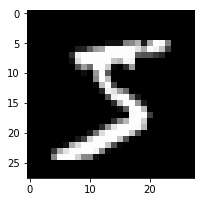

In [23]:
plot(images[0])

In [25]:
labels[0]

5

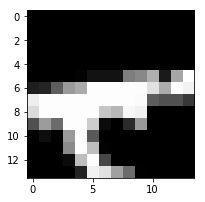

In [27]:
plot(images[0, 0:14, 8:22]) # we can also zoom in...

# Edge detection

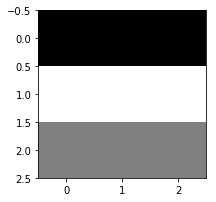

In [28]:
# we will look at how to crate an edge detector

top = [[-1,-1,-1],
       [ 1, 1, 1],
       [ 0, 0, 0]]

plot(top)

In [29]:
dims = np.index_exp[10:28:1, 3:13]
images[0][dims]

array([[0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.0549, 0.0039, 0.6039, 0.9922],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.5451, 0.9922],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.0431, 0.7451],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.1373],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.1529],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.0941, 0.4471, 0.8667],
       [0.    , 0.   

In [31]:
corrtop = correlate(images[0], top)

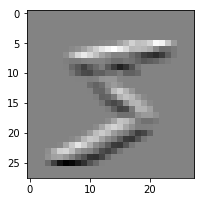

In [32]:
plot(corrtop)

In [ ]:
#what's going on top filter
"""
How could we maximize top with something
element wise multiplication...filter to element wise
"""

In [35]:
# convolution vs correlation
# convolutions are just flipped ........kind of same
# rotated read this shit....rachel is shit...kaamini this is different from correlation statistics between differnet variables 

In [39]:
np.rot90(top,1) # write this yourself

array([[-1,  1,  0],
       [-1,  1,  0],
       [-1,  1,  0]])

In [40]:
np.rot90(top,2)

array([[ 0,  0,  0],
       [ 1,  1,  1],
       [-1, -1, -1]])

True

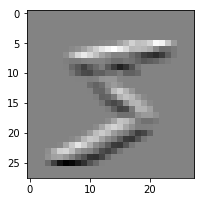

In [41]:
convtop = convolve(images[0], np.rot90(top,2))
plot(convtop)
np.allclose(convtop, corrtop) # it's rotated so it's same thing 

In [ ]:
straights=[np.ro]